# Building an Intelligent Fraud Detection System

For this project, we have used CRISP-DM framework in its data science process

## 1. Project Overview
Interpol (2024) states that causes of fraud in commercial banks and financial institutions are multifaceted. The increased use of technology has enabled organized crime groups to conduct sophisticated fraud campaigns at relatively low costs. Moreover, PYMNTS (2024) indicates the rise in scam-related frauds, particularly those exploiting consumer trust through social engineering, has led to a 56% increase in such incidents in 2024, surpassing traditional digital payment crimes. Regarding transaction methods, scams have become the leading form of fraud, surpassing digital payment fraud. The share of scam-related fraud increased by 56% in 2024, with financial losses from scams rising by 121%. These scams now account for 23% of all fraudulent transactions, with relationship and product scams responsible for most losses,(PYMNTS,2024). 

In Kenya, financial fraud has become an escalating concern, with recent incidents highlighting the vulnerability of the nation's financial institutions,(Kenya Wall Street,2024). A notable case involves Kiwipay Kenya Limited, where approximately Ksh2.3 billion ($19.48 million) was frozen due to suspicions of debit card fraud linked to an international syndicate. The CBK (2025) has identified several factors contributing to the rise of fraud within the country's financial sector. These include the increased adoption of information and communication technology (ICT), which, while enhancing operational efficiency, has also opened new avenues for cybercriminals. Additionally, a general lack of awareness regarding financial security among consumers has made them more susceptible to schemes such as social engineering and identity theft. Emerging cyber threats further exacerbate these challenges, necessitating robust cybersecurity measures across financial institutions. Among the various transaction methods, digital payment platforms have been significantly targeted by fraudsters. The CBK has observed that mobile and internet banking channels are particularly vulnerable, with fraudsters exploiting these platforms to conduct unauthorized transactions. This trend underscores the need for enhanced security protocols and increased consumer education to mitigate the risks associated with digital financial services.

## 2. BUSINESS UNDERSTANDING

Kenya has experienced a massive shift to digital banking and mobile transactions, with platforms like M-Pesa, PesaLink, and internet banking becoming dominant. However, this digitization has also led to an increase in financial fraud cases, such as:

- ATM and Card Fraud: Criminals use card skimming devices to steal customer information.

- SIM Swap Fraud: Fraudsters gain control of a victim’s SIM card to access mobile banking accounts.

- Social Engineering Attacks: Scammers impersonate banks to trick customers into revealing sensitive information.

- Account Takeovers: Unauthorized individuals gain access to banking credentials and conduct fraudulent transactions.

In Kenya, several fraud cases have made headlines, including:

- KCB Bank SIM Swap Scam (2021) – Customers lost millions after fraudsters illegally swapped SIM cards to gain access to their mobile banking.

- Equity Bank Card Cloning (2022) – A group of criminals was arrested for skimming debit card details from unsuspecting users.

- M-Pesa Fraud Rings (2023) – Multiple fraud cases involved con artists deceiving individuals into sending money via M-Pesa through fake job offers and lottery scams.

- To combat these threats, banks need an intelligent, adaptive fraud detection system that can identify fraudulent transactions in real time while minimizing false alarms.

### 1.2 Business Problem
Fraudulent banking transactions in Kenya have led to substantial financial losses and a decline in customer trust. Traditional rule-based fraud detection systems are insufficient in detecting sophisticated fraud schemes, especially as fraudsters continually evolve their tactics. There is a need for a machine learning-powered fraud detection system that can:

- Analyze past transaction data to learn fraud patterns

- Detect anomalies and flag suspicious transactions

- Adapt to new and emerging fraud techniques

- Operate in real time to prevent fraudulent transactions before they occurres. 

### 1.3 Business Objectives
The objective of this project is to develop a model to:
* Analyse card transaction patterns with a view to detect fraud

* Come up with a predictive models that can accurately classify transactions as fraudulent or legitimate

* Study how demographics including age and gender impact fraud risks.

* Identify peak fraud periods based on transactions date and transactions time.

* Establish a model that can detect suspicious card frauds in real time

### 1.4 Target Audience

This project is designed for:

- Banks and Financial Institutions classified as Tier one banks in Kenya, seeking to enhance their fraud prevention mechanisms.

- Mobile Money Operators like Safaricom (M-Pesa), Airtel Money, and Telkom T-Kash looking to secure transactions from mobile fraudsters.

- Regulatory Bodies and Government agencies, including the Central Bank of Kenya (CBK) and Communications Authority of Kenya, ensuring compliance with digital fraud policies.

- Individual bank customers and corporate clients who require a secure and reliable banking system free from fraudulent activities.

#### 1.5 Data Source and Description

The data was sourced from https://www.kaggle.com/datasets/marusagar/bank-transaction-fraud-detection 

The dataset used for model building contained 200000 observations of 24 variables.

Here are the information of the columns:

* Customer_ID: A particular identifier for every customer within the bank's system.

* Customer_Name: The name of the consumer making the transaction.

* Gender: The gender of the consumer (e.G., Male, Female, Other).

* Age: The age of the consumer at the time of the transaction.

* State: The nation in which the patron resides.

* City: The metropolis wherein the client is living.

* Bank_Branch: The specific financial institution branch wherein the consumer holds their account.

* Account_Type: The kind of account held with the aid of the customer (e.g., Savings, Checking).

* Transaction_ID: A particular identifier for each transaction.

* Transaction_Date: The date on which the transaction passed off.

* Transaction_Time: The specific time the transaction became initiated.

* Transaction_Amount: The financial value of the transaction.

* Merchant_ID: A particular identifier for the merchant worried within the transaction.

* Transaction_Type: The nature of the transaction (e.G., Withdrawal, Deposit, Transfer).

* Merchant_Category: The class of the merchant (e.G., Retail, Online, Travel).

* Account_Balance: The balance of the customer's account after the transaction.

* Transaction_Device: The tool utilized by the consumer to perform the transaction (e.G., Mobile, Desktop).

* Transaction_Location: The geographical vicinity (e.G., latitude, longitude) of the transaction.

* Device_Type: The kind of device used for the transaction (e.G., Smartphone, Laptop).


### 1.6 Metrics of Success
- Accuracy

- Precision

- Recall

### 1.7 Limitation

- The dataset class is imbalanced with fraudulent transactions making up a small prortion of the dataset, which may complicate the prediction of our model

### 1.7 Assumption

- Given the global fraud trends are also reported in the Kenyan banking environment coupled with rapid digital banking adoption, the Bank Transaction Fraud Detection data sourced from Kaggle is assumed to represent transactions patterns similar to Kenyan data on bank frauds.

In [487]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import zipfile
import warnings
import xgboost 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import neighbors
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,classification_report,roc_curve, RocCurveDisplay
from sklearn.datasets import make_classification
from sklearn.exceptions import UndefinedMetricWarning
sns.set_style(style='whitegrid')
warnings.simplefilter(action='ignore', category=FutureWarning)


### 2. DATA UNDERSTANDING

#### 2.1 Data Description and Quality

We will unzip the dataset first and then load it into a pandas DataFrame which will facilitate easy manipulation and analysis.

In [488]:
# Path to our zip file
zip_file_path = 'data/archive.zip'
extracted_files_path = 'data'

# Make sure the output directory exists
os.makedirs(extracted_files_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_files_path)

print(f"Files extracted to {extracted_files_path}")


Files extracted to data


Load the CSV file extracted into a pandas dataframe and read the first few rows of the data

In [489]:
# Read the CSV file into dataframes
df= pd.read_csv('data/Bank_Transaction_Fraud_Detection.csv')

# Display the first five rows of the dataframe
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


Next, we took steps to thoroughly understand the dataset before proceeding with data cleaning and transformation. This involved examining the structure and content of the dataset to gain insights into its composition and key characteristics.

In [490]:
# Checking the shape of the dataframe
df.shape

print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")


The dataset has 200000 rows and 24 columns


#### Checking information of the dataset

In [491]:
# Extract information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [492]:
# Checking for Data Types
df.dtypes

Customer_ID                 object
Customer_Name               object
Gender                      object
Age                          int64
State                       object
City                        object
Bank_Branch                 object
Account_Type                object
Transaction_ID              object
Transaction_Date            object
Transaction_Time            object
Transaction_Amount         float64
Merchant_ID                 object
Transaction_Type            object
Merchant_Category           object
Account_Balance            float64
Transaction_Device          object
Transaction_Location        object
Device_Type                 object
Is_Fraud                     int64
Transaction_Currency        object
Customer_Contact            object
Transaction_Description     object
Customer_Email              object
dtype: object

* The dataset has 2 columns with Float data type, 2 column with integer data type and 20 columns with categorical data types
*  The Transaction_Date and Transaction_Time columns are indicated as object data type. For analysis and feature engineering processes, the data types for the two columns will be converted to Datetime format
  
Next we shall check if there are any null values on the dataset


In [493]:
# Checking for null values
df.isna().sum()

Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

The Fraud Transaction dataset has no missing values. Next we will check for duplicate rows

In [494]:
# Checking for duplicate rows
duplicates = df.duplicated().sum()
duplicates

0

The dataset has no duplicate rows. We shall now generate summary statistics on numerical columns that will help us get insights on the dataset distribution

In [495]:
# Get summary statistics 
df.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,44.015110,49538.015554,52437.988784,0.050440
std,15.288774,28551.874004,27399.507128,0.218852
min,18.000000,10.290000,5000.820000,0.000000
25%,31.000000,24851.345000,28742.395000,0.000000
50%,44.000000,49502.440000,52372.555000,0.000000
75%,57.000000,74314.625000,76147.670000,0.000000
max,70.000000,98999.980000,99999.950000,1.000000


* The mean age, transaction amount and account Balance is 44 years, 49538 INR and 53437 INR respectively
* The standard deviation of the age transaction amount is 15 years, 28551 INR and 27399 INR respectively
* The minimum age and maximum age is 18 and 70 years

In [496]:
# Checking for the column names
df.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email'],
      dtype='object')

### 2.2 Exploratory Data Analysis (EDA)

After loading and understanding the dataset, we shall now analyze and visualize the dataset to understand the structure, patterns, and potential issues in the data.

#### Class Imbalance

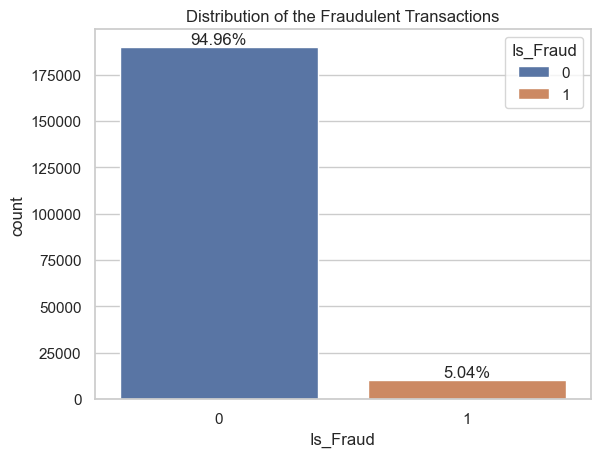

In [497]:
# Count the target variable 
fraud_counts = df["Is_Fraud"].value_counts(normalize=True) * 100

# Visualize the distribution
ax = sns.countplot(x="Is_Fraud", data=df, hue="Is_Fraud")
plt.title("Distribution of the Fraudulent Transactions")

# adding labels
for bar, percentage in zip(ax.patches, fraud_counts):
    height = bar.get_height()
    ax.annotate(f'{percentage:.2f}%',  
                (bar.get_x() + bar.get_width() / 2, height), 
                ha='center', va='bottom')  

# Show the plot
plt.show()


* For the class 0 indicating (Non-fraud cases) which is 94.956% of the data while for class 1 (fraud cases) 5.044% of the data. This shows existence of class imbalance that we need to address during modelling.

#### Gender Analysis

The review is th help establish Which gender has been affected most by fraud cases.

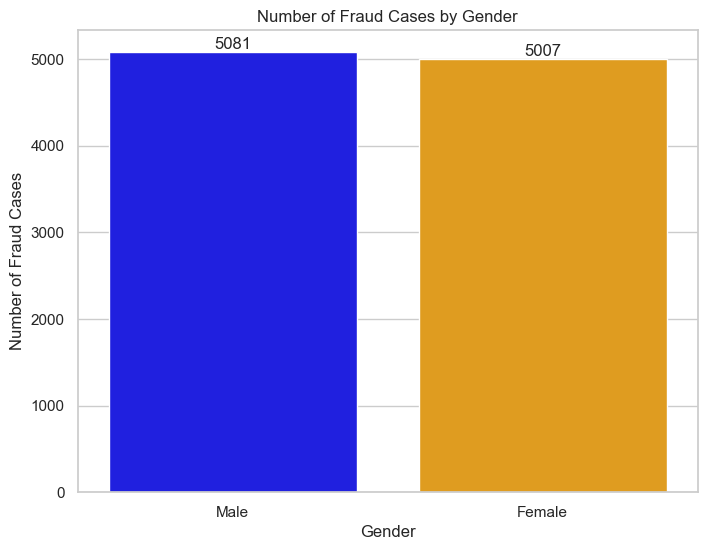

In [498]:
# Come up with the number of fraud cases for each gender
gender_fraud = df[df["Is_Fraud"] == 1]['Gender'].value_counts()

# Visualise the gender distribution
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=gender_fraud.index, y=gender_fraud.values, palette=["blue", "orange"])

# Add labels on each bar
for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge')  

# Titles
plt.title('Number of Fraud Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Fraud Cases')

# Show the visual
plt.show()


* The distribution points to a slightly higher number of reported fraud cases by affecting males as compared to females.

#### Magnitude targetted by Fraud

In [499]:
# Establish the total transaction amount affected by fraud
fraud_trans = df[df["Is_Fraud"] == 1]['Transaction_Amount'].sum()
non_fraud_trans = df[df["Is_Fraud"] == 0]['Transaction_Amount'].sum()

# Creating a dictionary for visualization
data = {
    'Fraud Status': ['Fraud', 'Non-Fraud'],
    'Total Transaction Amount': [fraud_trans, non_fraud_trans]
}

# bar plot elements
fig = px.bar(data, 
             x='Fraud Status', 
             y='Total Transaction Amount',
             title='Total Transaction Amount Affected by Fraud',
             labels={'Fraud Status': 'Fraud Status', 'Total Transaction Amount': 'Total Transaction Amount'},
             color='Fraud Status',
             color_discrete_map={'Fraud': 'blue', 'Non-Fraud': 'orange'}, 
             text='Total Transaction Amount')  

# Add labels and graph size
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(width=768, height=576)  

# Show the plot
fig.show()


* From the dataset,  a total transactions amount of 497.1157 Million Indian Rupees were reported to have been targetted by Fraud.

#### Fraud rate by transaction type

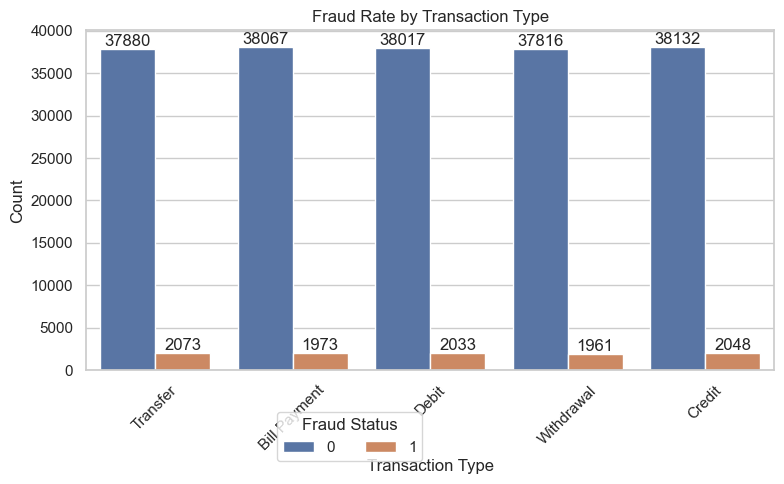

The transaction type with the highest cases of fraud is: Transfer


In [500]:
# Analyze the transaction type based on Fraud cases
fraud_counts = df[df['Is_Fraud'] == 1]['Transaction_Type'].value_counts()
highest_fraud_type = fraud_counts.idxmax()

# Create a visualization with labels and repositioned legend
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df['Transaction_Type'], hue=df['Is_Fraud'])

# Adding labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d')  

# Reposition the legend outside the plot
plt.legend(title='Fraud Status', bbox_to_anchor=(0.5, -0.1), ncol=2)  

# Display
plt.xticks(rotation=45)
plt.title("Fraud Rate by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.tight_layout()  
plt.show()

# Print the transaction type with the highest cases of fraud
print(f"The transaction type with the highest cases of fraud is: {highest_fraud_type}")


#### State and Fraud Cases Reported

<Figure size 1200x800 with 0 Axes>

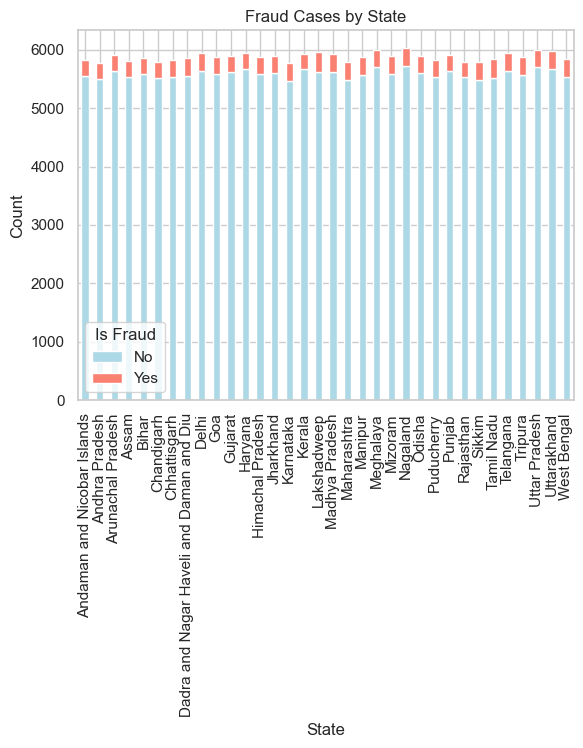

The state with the highest fraud cases is: Lakshadweep


In [501]:
# Function to find the state with the highest fraud cases
def state_with_highest_fraud(df):
    fraud_counts = df[df['Is_Fraud'] == 1]['State'].value_counts()
    highest_fraud_state = fraud_counts.idxmax()
    return highest_fraud_state

# Function to plot fraud cases by state
def plot_fraud_by_state(df):
    plt.figure(figsize=(12, 8))
    state_fraud_counts = df.groupby(['State', 'Is_Fraud']).size().unstack()
    state_fraud_counts.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
    plt.title('Fraud Cases by State')
    plt.xlabel('State')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title='Is Fraud', labels=['No', 'Yes'])
    plt.show()

# Find the state with the highest fraud cases
highest_fraud_state = state_with_highest_fraud(df)

# Plotting the relationship
plot_fraud_by_state(df)

print(f"The state with the highest fraud cases is: {highest_fraud_state}")

#### Analysis of Fraud by the Transaction device


Here is the sorted data by Transaction Device and Fraud Status:
Is_Fraud                          0     1
Transaction_Device                       
Self-service Banking Machine  20650  1057
ATM                           20167  1033
ATM Booth Kiosk               20067  1082
Debit/Credit Card              7818   455
Smart Card                     7722   411
Wearable Device                7729   399
Virtual Card                   7620   439
Tablet                         7652   407
Desktop/Laptop                 7646   411
Voice Assistant                7627   412
POS Mobile Device              7600   406
Banking Chatbot                7617   378
Web Browser                    7573   408
Biometric Scanner              7523   429
QR Code Scanner                7527   411
Mobile Device                  7482   397
Payment Gateway Device         7452   422
POS Mobile App                 7477   391
Bank Branch                    7480   375
POS Terminal                   7483   365


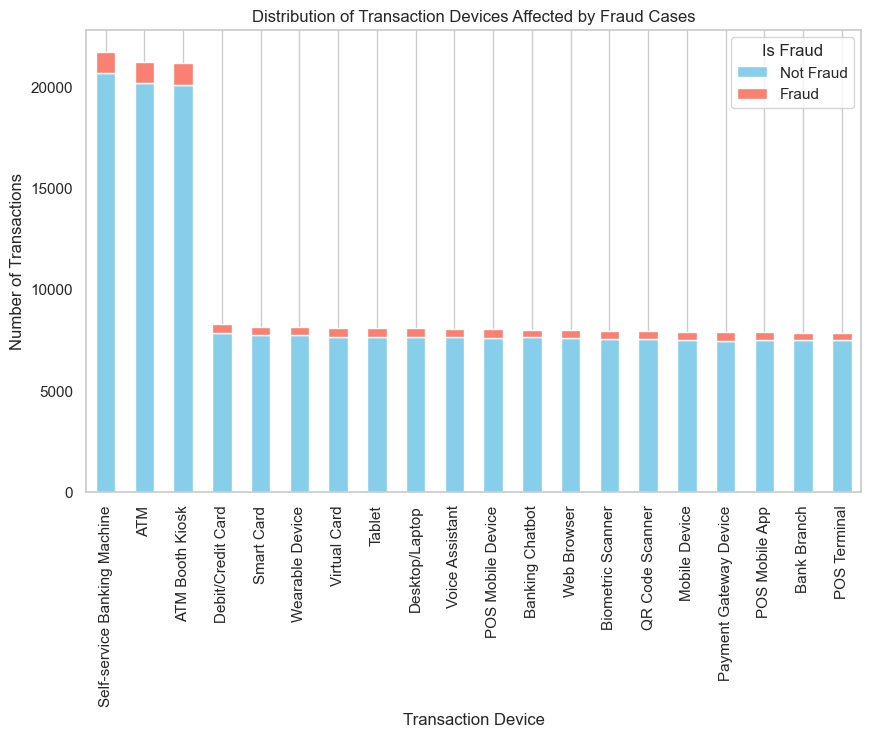


The transaction device with the highest fraud cases is: ATM Booth Kiosk


In [502]:
# Group the transaction devices and fraud status
grouped_data = df.groupby(['Transaction_Device', 'Is_Fraud']).size().unstack(fill_value=0)

# Sort the grouped data by the total number of transactions (sum across rows)
grouped_data['Total'] = grouped_data.sum(axis=1)  # Add a Total column for sorting
grouped_data = grouped_data.sort_values(by='Total', ascending=False)  # Sort by Total
grouped_data = grouped_data.drop(columns=['Total'])  # Drop the Total column after sorting

# Print the sorted data
print("\nHere is the sorted data by Transaction Device and Fraud Status:")
print(grouped_data)

# Find the transaction device with the highest fraud cases
highest_fraud_device = grouped_data[1].idxmax()

# Plot the sorted data
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Distribution of Transaction Devices Affected by Fraud Cases')
plt.xlabel('Transaction Device')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.legend(title='Is Fraud', labels=['Not Fraud', 'Fraud'], loc='upper right')
plt.grid(axis='y')

# Show the plot
plt.show()

print(f"\nThe transaction device with the highest fraud cases is: {highest_fraud_device}")


#### Age and Fraud Analysis

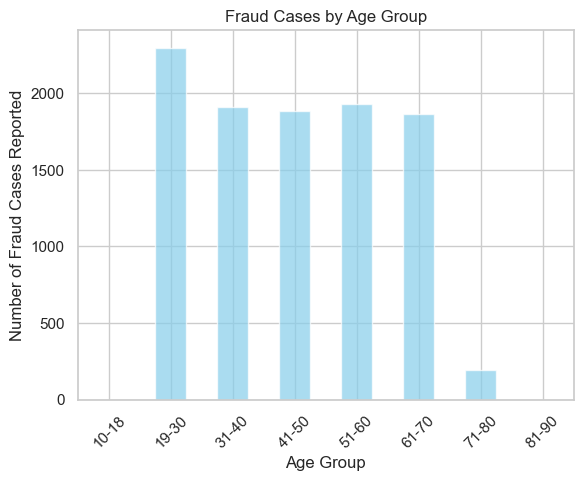

In [503]:
# Classify the age into bins for the ages affected by fraud.
bins = [10, 18, 30, 40, 50, 60, 70, 80, 90]
labels = ['10-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
df['age_group'] = pd.cut(df['Age'], bins = bins, labels = labels, right = False)

# filter the DataFrame for fraud cases and group 
age_bins_fraud = df[df["Is_Fraud"] == True]['age_group'].value_counts().sort_index()

# plot the ages for each bin showing the fraud cases
age_bins_fraud.plot(kind = 'bar', color = 'skyblue', alpha = .7)
plt.title('Fraud Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Fraud Cases Reported')
plt.xticks(rotation=45)
plt.show()

* For customers at the age 19-30 and 51 - 60 show significantly higher numbers of fraud cases which further indicates that individuals in the age gropus are more vulnerable to fraud.

#### Analysis of Time of fraud

In [504]:
df.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email', 'age_group'],
      dtype='object')

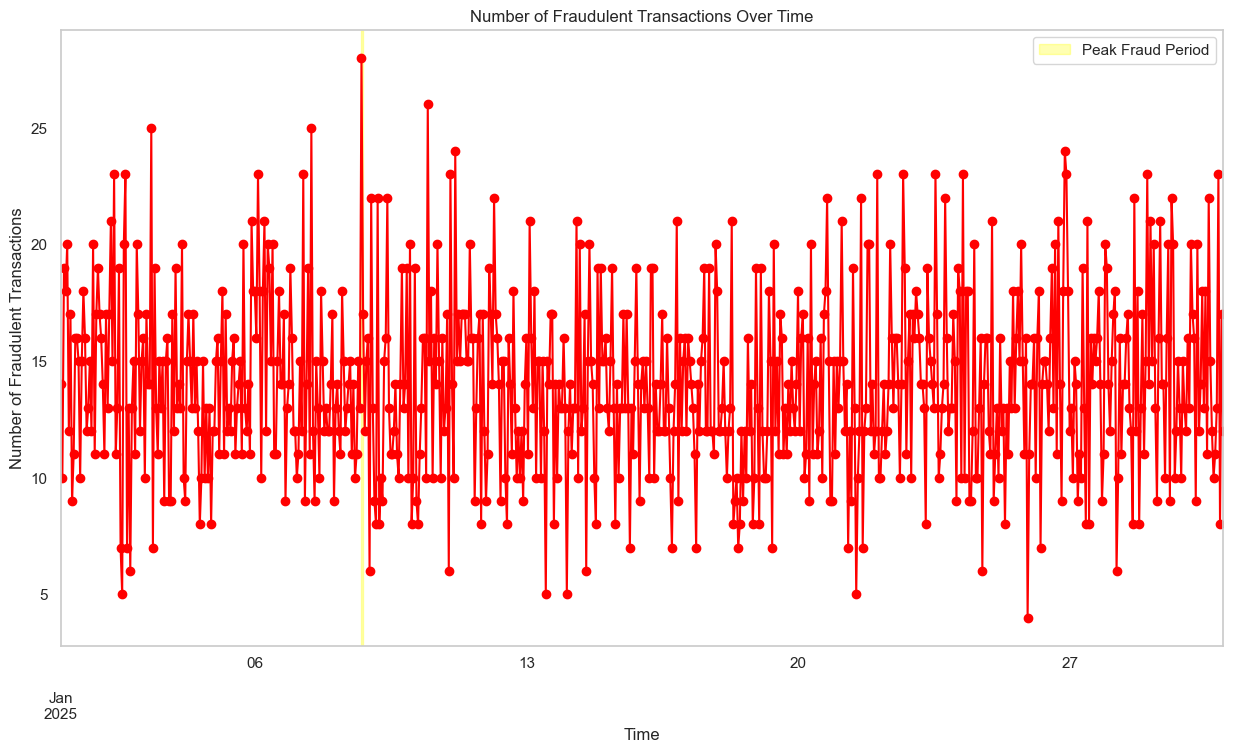


Peak Fraud Period:
Start: 2025-01-08 18:00:00
End: 2025-01-08 19:00:00


In [505]:
# Combine Transaction_Date and Transaction_Time into a single datetime column with dayfirst=True
df['transaction_datetime'] = pd.to_datetime(df['Transaction_Date'] + ' ' + df['Transaction_Time'], dayfirst=True)

# Filter the dataset to include only fraudulent transactions
fraud_df = df[df['Is_Fraud'] == 1]

# Resample the data to count the number of frauds per hour
fraud_df.set_index('transaction_datetime', inplace=True)  # Correcting the typo here
fraud_counts = fraud_df.resample('H').size()

# Identify the peak fraud period
peak_period_start = fraud_counts.idxmax()
peak_period_end = peak_period_start + pd.Timedelta(hours=1)

# Visualize the fraud counts over time
plt.figure(figsize=(15, 8))
fraud_counts.plot(kind='line', marker='o', color='red')
plt.axvspan(peak_period_start, peak_period_end, color='yellow', alpha=0.3, label='Peak Fraud Period')
plt.title("Number of Fraudulent Transactions Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Fraudulent Transactions")
plt.legend()
plt.grid()
plt.show()

# Print the peak fraud period
print("\nPeak Fraud Period:")
print(f"Start: {peak_period_start}")
print(f"End: {peak_period_end}")


#### Categorical and numerical columns

Identify numerical and categorical columns in the dataset

In [506]:
# Establish the numerical and categorical columns in the dataset
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Print the numerical and categorical columns in the dataset
print(f"1. The numerical columns in the dataset are: {num_cols}\n")
print(f"2. The categorical columns in the dataset are: {cat_cols}")

1. The numerical columns in the dataset are: ['Age', 'Transaction_Amount', 'Account_Balance', 'Is_Fraud']

2. The categorical columns in the dataset are: ['Customer_ID', 'Customer_Name', 'Gender', 'State', 'City', 'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date', 'Transaction_Time', 'Merchant_ID', 'Transaction_Type', 'Merchant_Category', 'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Transaction_Currency', 'Customer_Contact', 'Transaction_Description', 'Customer_Email']


#### Univariate Analysis

Visualise data distribution

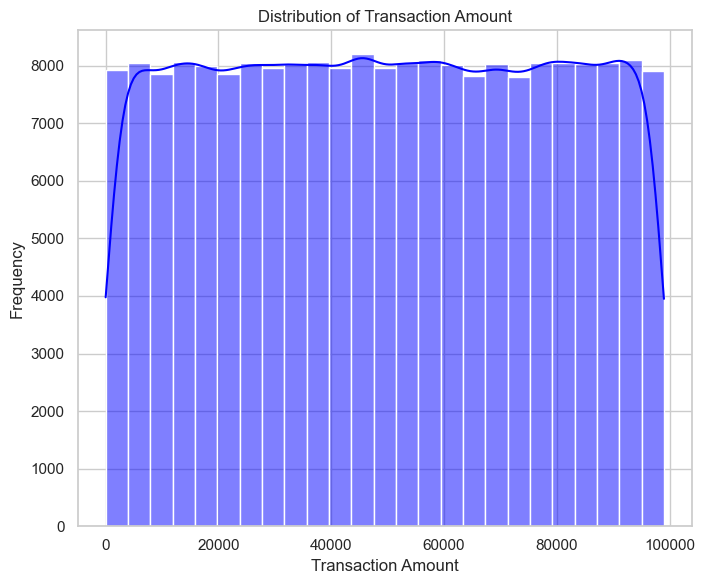

In [507]:
# Creating histograms for univariate EDA on Transaction Amount
plt.figure(figsize=(20, 6))

# Histogram for Transaction Amount
plt.subplot(1, 3, 1)
sns.histplot(df['Transaction_Amount'], bins=25, kde=True, color="blue")
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



* The distribution of the histogram appears to be approximately normal, indicating that most transactions are of moderate value, with a balanced spread of lower and higher amounts. This suggests a consistent transaction behavior among customers, with no significant outliers skewing the data

Next we will plot a Histogram of Account balance

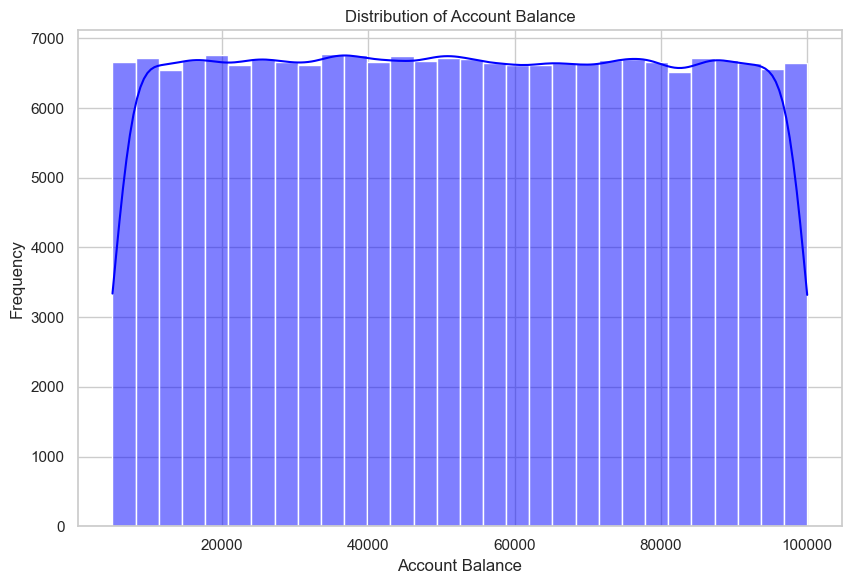

In [508]:
# Histogram for Account Balance
plt.figure(figsize=(25, 6))

plt.subplot(1, 3, 2)
sns.histplot(df['Account_Balance'], bins=30, kde=True, color="blue")
plt.title('Distribution of Account Balance')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


* The account balance distribution resembles a normal distribution, suggesting that customers maintain a variety of account balances that are evenly distributed around the average. This could imply a healthy mix of account types and customer financial behaviors.

Next we will plot a Histogram for the age column

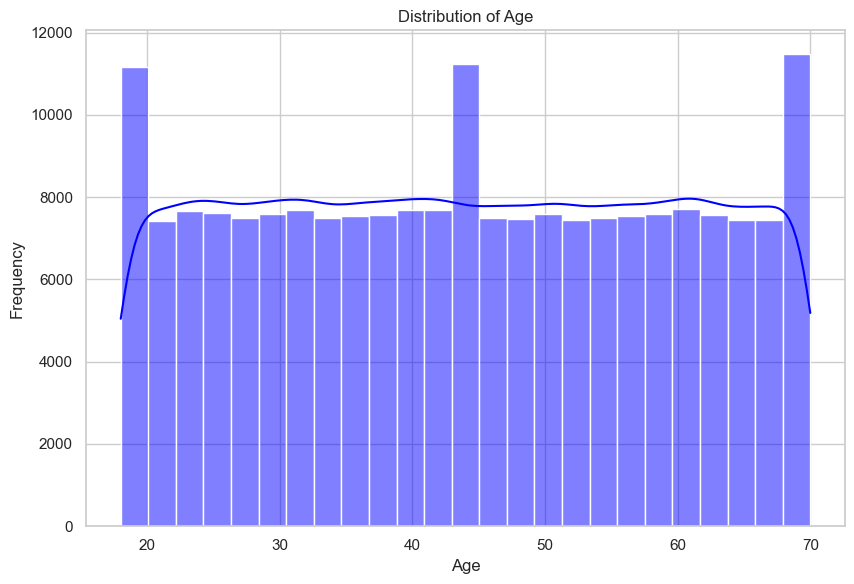

In [509]:
# Histogram for Age
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 2)
sns.histplot(df['Age'], bins=25, kde=True, color="blue")
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


* The age distribution shows a more uniform spread, with a slight concentration in the middle age range (around 30-50 years). This suggests that the bank's customer base is primarily composed of middle-aged individuals.

#### Boxplot of numerical features with indicator of fraud

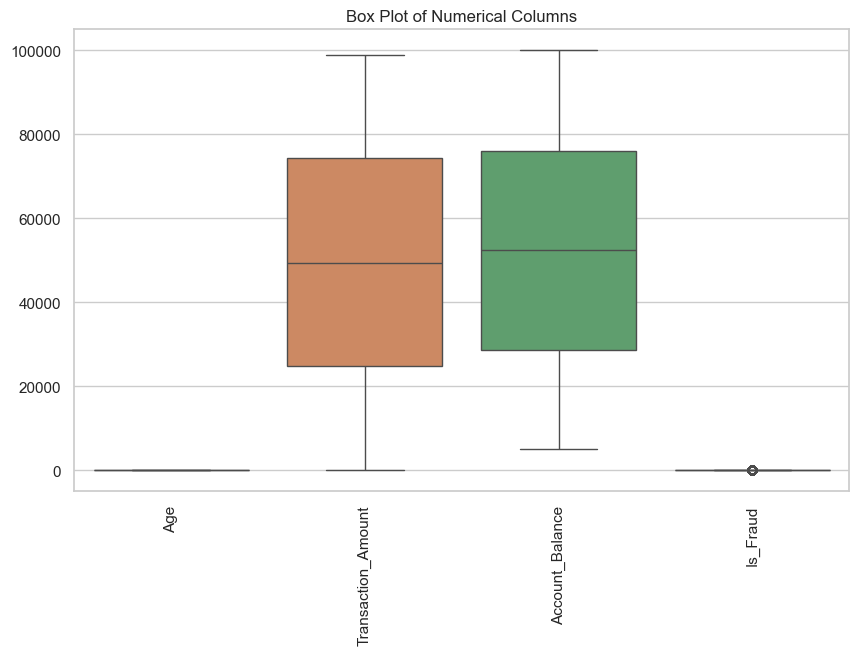

In [510]:
# Create Box plot to visualize numerical columns
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=df[num_cols]) 
plt.xticks(rotation=90)  
# Title of the box plot
plt.title('Box Plot of Numerical Columns')

# Display the box plot
plt.show()

* The box plot provides a visual summary of the distribution of numerical features, highlighting the median, quartiles, and potential outliers.
* Transaction Amount and Account Balance show a wide range, indicating significant variability in these transactions.
* From the plot, there are no outliers in the dataset
* The Age column appears to have a more concentrated distribution, indicating that most customers fall within a certain age range.

#### Bivariate Analysis

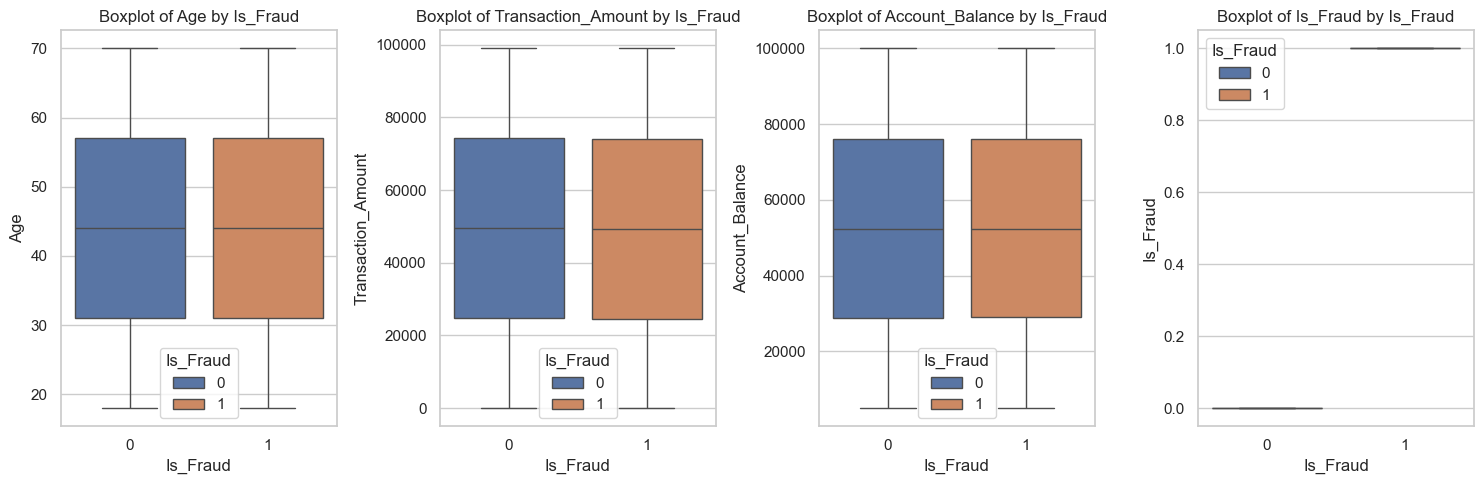

In [511]:
# Plotting the relationship between numerical features and the target variable 'Is_Fraud'
plt.figure(figsize=(15, 5))
for i, feature in enumerate(num_cols):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(x='Is_Fraud', y=feature, data=df, hue='Is_Fraud')
    plt.title('Boxplot of ' + feature + ' by Is_Fraud')
plt.tight_layout()
plt.show()



* The boxplots for numerical features by Is_Fraud indicate that there is no significant difference in the distributions of these features between fraudulent and non-fraudulent transactions. Both categories show similar ranges and medians, suggesting that the numerical features do not provide strong discriminatory power for identifying fraudulent transactions. This could imply that other factors, possibly categorical or behavioral, may be more relevant in predicting fraud


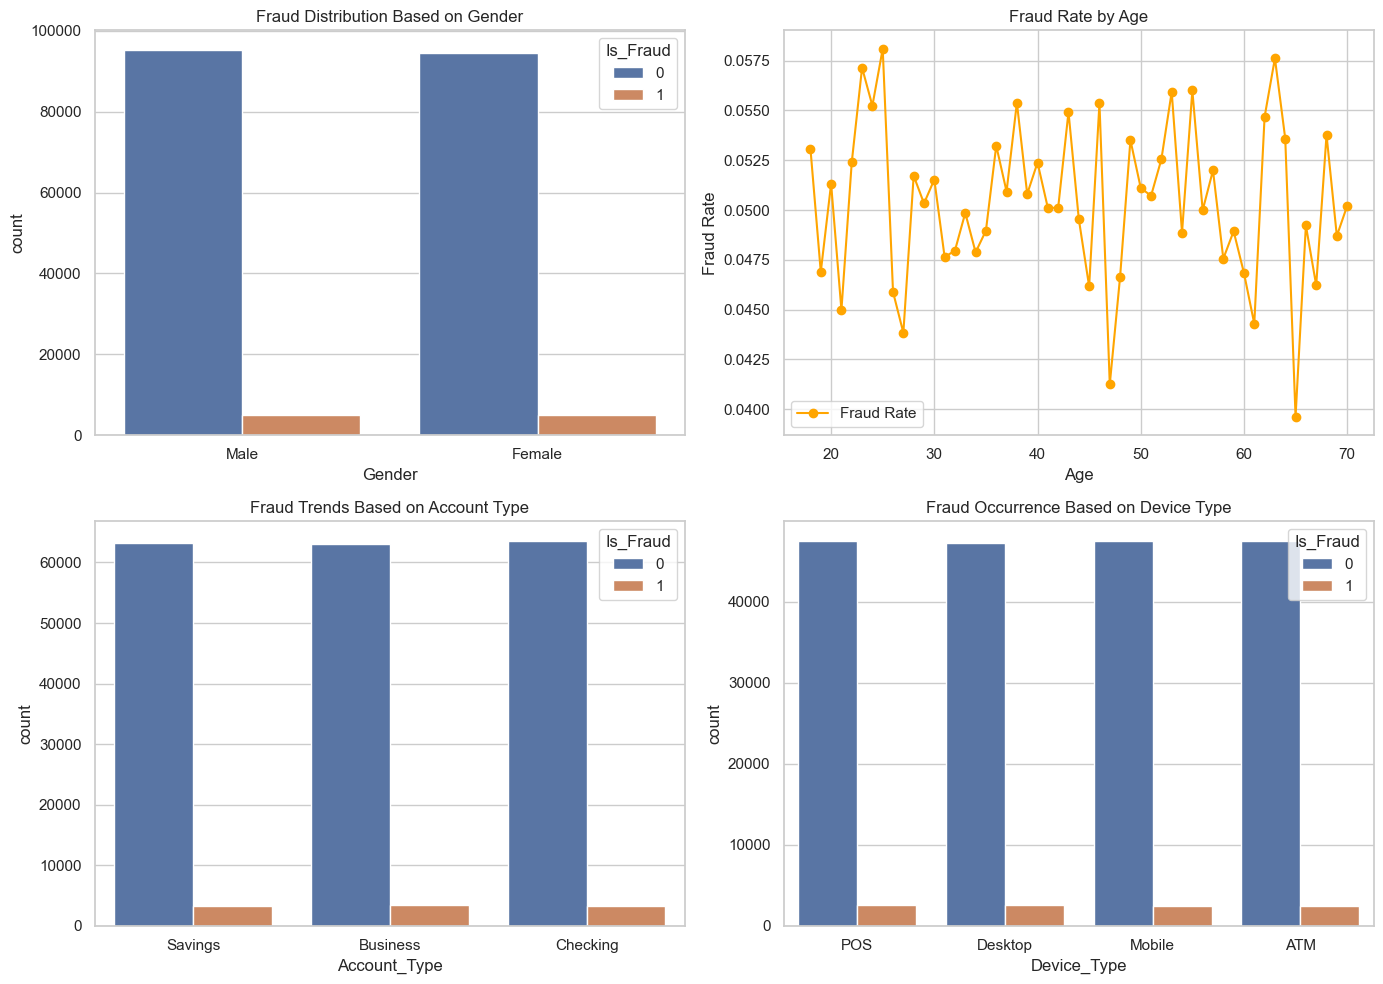

In [512]:
# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  
axes = axes.flatten() 

# 1. Gender vs. Is_Fraud (Countplot)
sns.countplot(ax=axes[0], x='Gender', hue='Is_Fraud', data=df)
axes[0].set_title('Fraud Distribution Based on Gender')

# 2. Age vs. Is_Fraud (Line Graph)
age_fraud_counts = df.groupby('Age')['Is_Fraud'].sum()  # Sum of fraud cases per age
age_total_counts = df['Age'].value_counts().sort_index()  # Total transactions per age
fraud_rate = age_fraud_counts / age_total_counts  # Fraud rate per age

axes[1].plot(fraud_rate.index, fraud_rate.values, marker='o', linestyle='-', color='orange', label='Fraud Rate')
axes[1].set_title('Fraud Rate by Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Fraud Rate')
axes[1].legend()

# 3. Account Type vs. Is_Fraud (Countplot)
sns.countplot(ax=axes[2], x='Account_Type', hue='Is_Fraud', data=df)
axes[2].set_title('Fraud Trends Based on Account Type')

# 4. Device Type vs. Is_Fraud (Countplot)
sns.countplot(ax=axes[3], x='Device_Type', hue='Is_Fraud', data=df)
axes[3].set_title('Fraud Occurrence Based on Device Type')

# Adjust layout
plt.tight_layout()
plt.show()

* The count plot shows that there are more non-fraudulent transactions for both genders, but the proportion of fraudulent transactions is slightly higher among males compared to females. This suggests that gender may play a role in the likelihood of fraud, warranting further investigation into behavioral patterns.
* The line graph illustrates the fraud rate by age, indicating that the fraud rate tends to increase with age, peaking in the middle age range (around 40-50 years). This suggests that older customers may be more susceptible to fraud, which could be due to various factors such as financial literacy or exposure to fraud schemes.
* The distribution of fraudulent transactions across different devices is relatively equal, indicating that there may not be a significant difference in fraud occurrence based on the device used. 


#### Multivariate Analysis

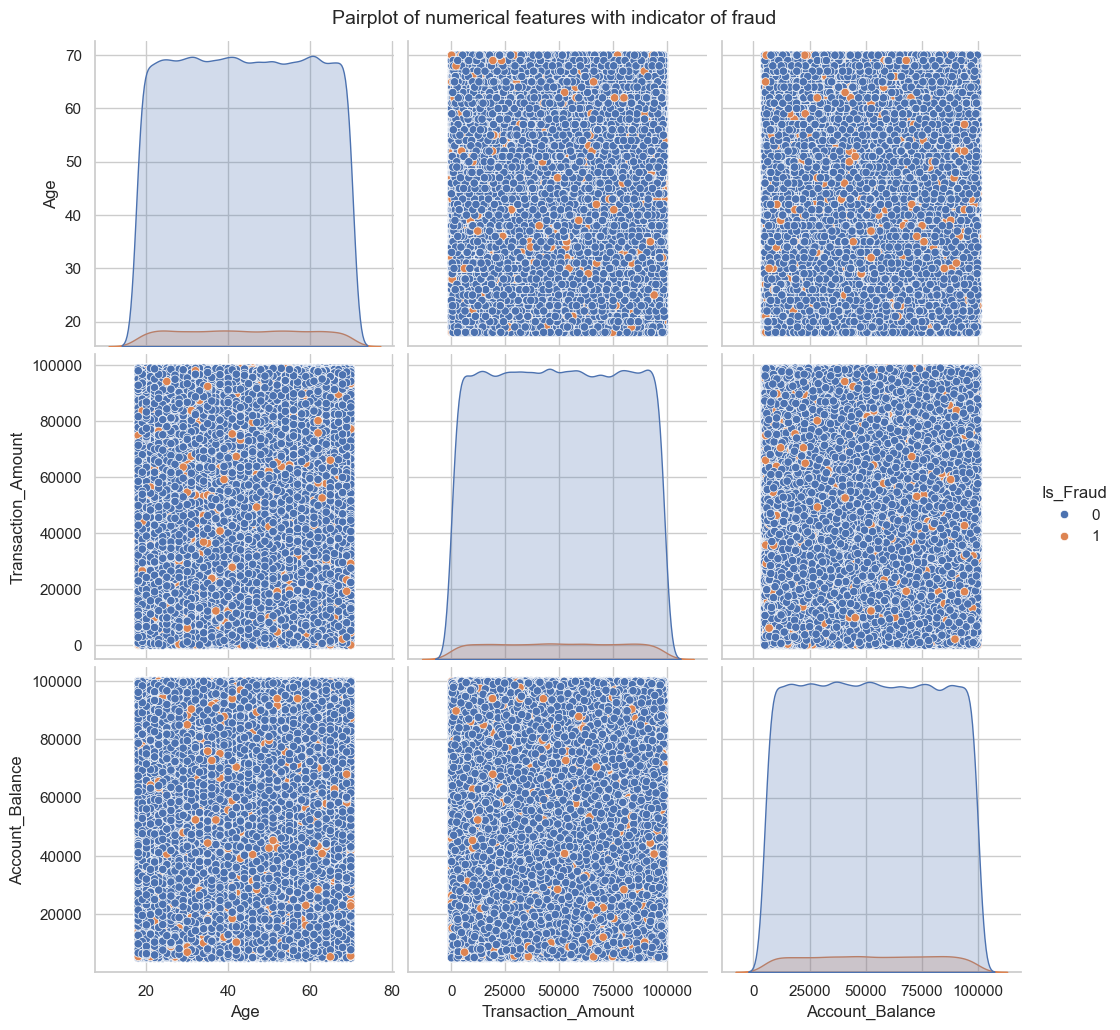

In [513]:
# Visualizing a pairplot for all columns with numerical values in the DataFrame
pairplot=sns.pairplot(df, hue='Is_Fraud', kind='scatter', height=3.5)

# Title
pairplot.fig.suptitle("Pairplot of numerical features with indicator of fraud", fontsize=14)
plt.subplots_adjust(top=0.95)

plt.show()


In [514]:
# Group by Customer_Email to count total transactions and fraud cases
email_fraud_analysis = df.groupby("Customer_Email")["Is_Fraud"].agg(["count", "sum"])
email_fraud_analysis.rename(columns={"count": "Total_Transactions", "sum": "Fraud_Cases"}, inplace=True)

# Calculate fraud rate for each email
email_fraud_analysis["Fraud_Rate"] = email_fraud_analysis["Fraud_Cases"] / email_fraud_analysis["Total_Transactions"]

# Sort by fraud rate
email_fraud_analysis_sorted = email_fraud_analysis.sort_values(by="Fraud_Rate", ascending=False)

# Get strongest (most fraudulent) and weakest (least fraudulent) emails
strongest_email = email_fraud_analysis_sorted.iloc[0]
weakest_email = email_fraud_analysis_sorted.iloc[-1]

# Display results
print("\n### Strongest Email (Most Fraudulent) ###\n", strongest_email)
print("\n### Weakest Email (Least Fraudulent) ###\n", weakest_email)


### Strongest Email (Most Fraudulent) ###
 Total_Transactions    43.000000
Fraud_Cases           10.000000
Fraud_Rate             0.232558
Name: eiravatiXXX@XXXXX.com, dtype: float64

### Weakest Email (Least Fraudulent) ###
 Total_Transactions    49.0
Fraud_Cases            0.0
Fraud_Rate             0.0
Name: ekantikaXXX@XXXXXXX.com, dtype: float64


In [515]:
# Filter emails with at least 5 transactions (to avoid misleading results from very few transactions)
email_fraud_analysis_filtered = email_fraud_analysis[email_fraud_analysis["Total_Transactions"] >= 5]

# Get top 10 strongest (most fraudulent) and weakest (least fraudulent) emails
top_strongest_emails = email_fraud_analysis_sorted.head(10)
top_weakest_emails = email_fraud_analysis_sorted.tail(10)

# Display results
print("\n### Top 10 Strongest Emails (Most Fraudulent) ###\n", top_strongest_emails)
print("\n### Top 10 Weakest Emails (Least Fraudulent) ###\n", top_weakest_emails)


### Top 10 Strongest Emails (Most Fraudulent) ###
                          Total_Transactions  Fraud_Cases  Fraud_Rate
Customer_Email                                                      
eiravatiXXX@XXXXX.com                    43           10    0.232558
jeremiahXXX@XXXXX.com                    36            8    0.222222
jagratiXXXX@XXXXX.com                    34            7    0.205882
mayaXXXXX@XXXXXXX.com                    39            8    0.205128
hariniXXX@XXXXXX.com                     40            8    0.200000
keyaXXX@XXXXX.com                        45            9    0.200000
manyaXXX@XXXXXX.com                      30            6    0.200000
ekalingaXXX@XXXXXXX.com                  37            7    0.189189
nirjaXXXX@XXXXXXX.com                    37            7    0.189189
ridhiXXX@XXXXXX.com                      43            8    0.186047

### Top 10 Weakest Emails (Least Fraudulent) ###
                          Total_Transactions  Fraud_Cases  Fraud_Rate


### Feature Engineering

#### Converting Transaction_Date and Transaction_Time to DateTime Format

In [516]:
# Converting to numericals
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], format='%d-%m-%Y')
df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'], format='%H:%M:%S')

# Extracting new features from 'Transaction_Date' and 'Transaction_Time'
df['Transaction_Day'] = df['Transaction_Date'].dt.day
df['Transaction_Hour'] = df['Transaction_Time'].dt.hour
df['Transaction_Minute'] = df['Transaction_Time'].dt.minute
df['Transaction_Second'] = df['Transaction_Time'].dt.second

# Drop 'Transaction_Date' and 'Transaction_Time' columns after feature extraction
df = df.drop(columns=['Transaction_Date', 'Transaction_Time'])
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Amount,...,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email,age_group,transaction_datetime,Transaction_Day,Transaction_Hour,Transaction_Minute,Transaction_Second
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,32415.45,...,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com,61-70,2025-01-23 16:04:07,23,16,4,7
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,43622.60,...,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com,51-60,2025-01-11 17:14:53,11,17,14,53
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,63062.56,...,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com,19-30,2025-01-25 03:09:52,25,3,9,52
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,14000.72,...,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com,51-60,2025-01-19 12:27:02,19,12,27,2
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,18335.16,...,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com,41-50,2025-01-30 18:30:46,30,18,30,46


#### Correlation analysis to help us understand feature relationship

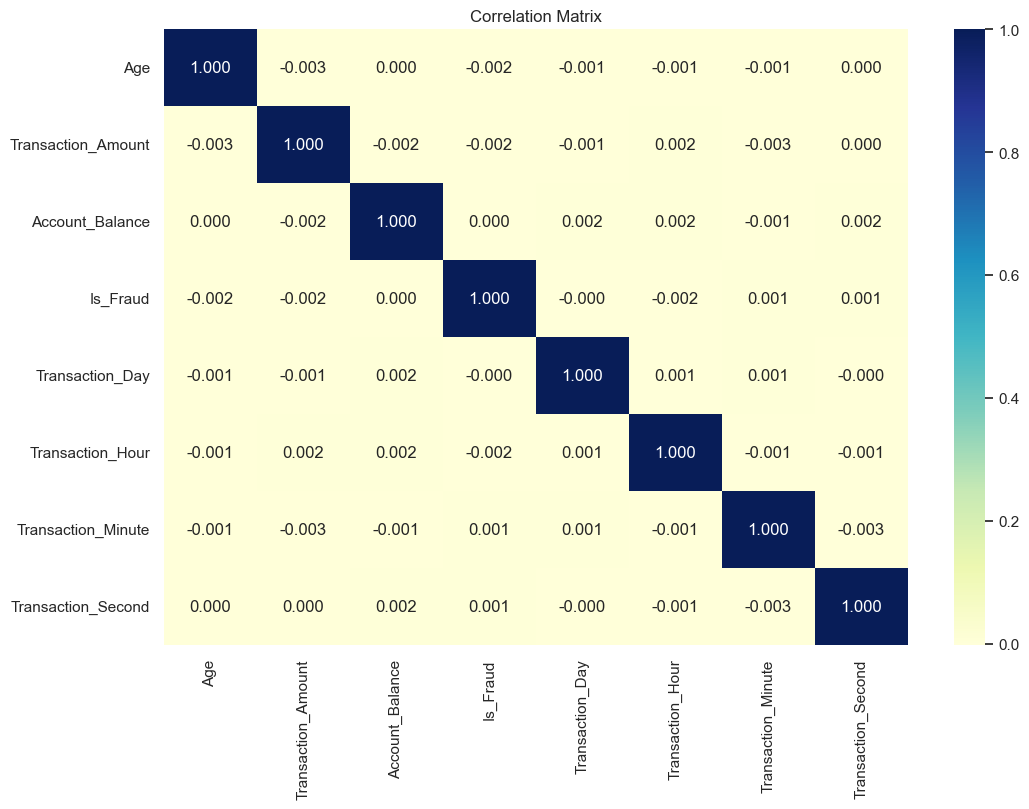

In [517]:
# Compute correlation for all numeric columns in DataFrames
corr_trained = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr_trained,annot=True,cmap="YlGnBu", fmt=".3f")
plt.title("Correlation Matrix");

## 3. DATA PREPARATION

We removed State and City since it has been combined under Transaction_Location column. We also expunge customer and transaction related columns that may not have an impact on the model. We also deleted column "age_group" as it was a new field we came up with. Column 'transaction_datetime' is not needed as we have Transaction_Day and Transaction_Hour to represent the same information as transaction_datetime.

In [518]:
# Remove columns not necessary to evaluate the mode performance
Cols_to_drop=["Customer_ID", "Customer_Name", "Transaction_ID","Merchant_ID", "Customer_Contact", "Customer_Email", "State", "City", "Transaction_Currency", "Transaction_Description","age_group","transaction_datetime"]
df_clean = df.drop(columns=Cols_to_drop)

#print(df.shape)
print(f"The dataset has {df_clean.shape[0]} rows and {df_clean.shape[1]} columns")


The dataset has 200000 rows and 16 columns


In [519]:
df_clean.columns

Index(['Gender', 'Age', 'Bank_Branch', 'Account_Type', 'Transaction_Amount',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Day', 'Transaction_Hour', 'Transaction_Minute',
       'Transaction_Second'],
      dtype='object')

#### Checking for outliers

In [520]:
# Detect outliers using IQR
for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}: {outliers.shape[0]}")

Outliers in Age: 0
Outliers in Transaction_Amount: 0
Outliers in Account_Balance: 0
Outliers in Is_Fraud: 10088


From the above, the target variable appears to have outlier outliers. These are not outliers but representation of is_fraud and non-fraud.

In [521]:
# # Select numerical columns
# numerical_cols = ['Is_Fraud']

# # Function to remove outliers using IQR
# def remove_outliers_iqr(df_clean, columns):
#     for col in columns:
#         Q1 = df_clean[col].quantile(0.25)
#         Q3 = df_clean[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         df_clean = df_clean[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
#     return df_clean

# # Remove outliers
# df_cleaned_final = remove_outliers_iqr(df_clean, numerical_cols)

# # Print before and after removing outliers
# print(f"Original dataset shape: {df_clean.shape}")
# print(f"Cleaned dataset shape: {df_cleaned_final.shape}")

In [522]:
# # Select numerical columns
# cols = ['Age', 'Transaction_Amount', 'Account_Balance']

# # Function to remove outliers using IQR
# def remove_outliers_iqr(df, columns):
#     df_filtered = df.copy()  # Create a copy to avoid modifying original data
#     for col in columns:
#         Q1 = df_filtered[col].quantile(0.25)
#         Q3 = df_filtered[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]
#     return df_filtered

# # Remove outliers
# df_cleaned = remove_outliers_iqr(df, numerical_cols)

# # Print before and after removing outliers
# print(f"Original dataset shape: {df.shape}")
# print(f"Cleaned dataset shape: {df_cleaned.shape}")

#### Next steps
- Convert categorical features into numerical format using one-hot encoding. 

- Standardize numerical features to ensure they are on a similar scale. 

- Separate the features and the target variable (Is_Fraud). 

In [523]:
# Identifying specified columns for the numerical and categorical featues
final_num_cols = [col for col in df_clean.select_dtypes(include=["int64", "float64"]).columns if col != "Is_Fraud"]
final_cat_cols = df_clean.select_dtypes(include=["object"]).columns.tolist()

# print out the numerical and categorical columns in the dataset
print(f"The numerical columns in the dataset are:{','.join(final_num_cols)}.")

print(f"The categorical columns in the dataset are: {', '.join(final_cat_cols)}.")

The numerical columns in the dataset are:Age,Transaction_Amount,Account_Balance.
The categorical columns in the dataset are: Gender, Bank_Branch, Account_Type, Transaction_Type, Merchant_Category, Transaction_Device, Transaction_Location, Device_Type.


In [524]:
encoder = LabelEncoder()
for col in final_cat_cols :
    df_clean[col] = encoder.fit_transform(df_clean[col]) 

## 4. MODELLING & EVALUATION

### Determining the best model 

Step taken:

Come up with a base model

- feature scaling

- dimensionality reduction, using PCA to project data onto 2 dimensional space

- We will then end with fitting to our final estimators.

Afterward, and almost completely unrelated, in order to make this a little more like a full-fledged workflow (it still isn't, but closer), we will:

- Follow up with scoring test data

- Compare pipeline model accuracies

- Identify the "best" model, meaning that which has the highest accuracy on our test data


#### Models used

- Logisitic Regression

- Decision  Classifier

- Random Forest Classifier

- KNeighborsClassifier

- XGBClassifier

- Bagging classifier 

- Adaboost classifier

- Gradient Boosting

In [525]:
dt = DecisionTreeClassifier(random_state=42)

In [526]:
# # Identifying features and target variable
X = df_clean.drop(columns='Is_Fraud')
y = df_clean['Is_Fraud']
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [527]:
# preprocessor = ColumnTransformer([
#     ('num', StandardScaler(), final_num_cols),
#     ('encoder', LabelEncoder(), final_cat_cols)])

In [528]:
# # Apply SMOTE 
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [529]:
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)
ratio

18.89307472336193

In [530]:
# pipeline_smote = Pipeline([
#     ('preprocessor', preprocessor),
#     ('smote', SMOTE(random_state=42))])

In [531]:
# Define a function to create pipelines
def create_pipeline(model):
    return Pipeline([
        ('scl', StandardScaler()),
        ('clf', model)
    ])

# Define models
models = {
    "logistic_regression": LogisticRegression(class_weight="balanced", random_state=42),
    "decision_tree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "random_forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "knn": KNeighborsClassifier(n_neighbors=5, weights="distance"),
    "bagging_classifier": BaggingClassifier(random_state=42, n_estimators=50),
    "adaboost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "gradient_boosting" : GradientBoostingClassifier(n_estimators = 50, random_state=2),
    "xgboost": XGBClassifier(scale_pos_weight=ratio, random_state=42)
}

# Create pipelines dynamically
pipelines = {name: create_pipeline(model) for name, model in models.items()}


In [547]:
# Fit each pipeline in the dictionary
for name, pipe in pipelines.items():
    print(f"Fitting {name} model")
    pipe.fit(X_train, y_train)

Fitting logistic_regression model
Fitting decision_tree model
Fitting random_forest model
Fitting knn model
Fitting bagging_classifier model
Fitting adaboost model
Fitting gradient_boosting model
Fitting xgboost model
Fitting tuned_random_forest model


In [534]:
# Compare accuracies
for name, model in pipelines.items():
    test_acc = model.score(X_test, y_test)
    print(f"{name} pipeline test accuracy: {test_acc:.4f}")

# Identify the most accurate model on test data
best_acc = 0.0
best_model = None
best_name = ""

for name, model in pipelines.items():
    test_acc = model.score(X_test, y_test)  # Store accuracy
    if test_acc > best_acc:
        best_acc = test_acc
        best_model = model
        best_name = name

print(f"Classifier with best accuracy: {best_name} ({best_acc:.4f})")

logistic_regression pipeline test accuracy: 0.5058
decision_tree pipeline test accuracy: 0.9002
random_forest pipeline test accuracy: 0.9489
knn pipeline test accuracy: 0.9478
bagging_classifier pipeline test accuracy: 0.9487
adaboost pipeline test accuracy: 0.9489
gradient_boosting pipeline test accuracy: 0.9488
xgboost pipeline test accuracy: 0.7325
Classifier with best accuracy: random_forest (0.9489)


In [535]:
# # Construct pipelines
# pipe_log = Pipeline([('scl', StandardScaler()),
# 			('clf', LogisticRegression(class_weight="balanced",random_state=42))])
			
# pipe_dtree = Pipeline([('scl', StandardScaler()),
# 			('clf', tree.DecisionTreeClassifier(class_weight="balanced", random_state=42))])

# pipe_rf = Pipeline([('scl', StandardScaler()),
# 			('clf', ensemble.RandomForestClassifier(class_weight="balanced", random_state=42))])

# pipe_kn = Pipeline([('scl', StandardScaler()),
# 			('clf', neighbors.KNeighborsClassifier(n_neighbors=5, weights="distance"))])

# pipe_xgb = Pipeline([('scl', StandardScaler()),
# 			('clf', XGBClassifier(scale_pos_weight=ratio,random_state=42))])

In [536]:
# # List of pipelines 
# pipelines = [pipe_log, pipe_dtree,pipe_rf,pipe_kn,pipe_xgb]


In [537]:
# # Fit the pipelines
# for pipe in pipelines:
# 	pipe.fit(X_train, y_train)

In [538]:
# # Dictionary of pipelines and classifier types for ease of reference
# pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree Classifier', 2: 'Random Forest Classifier', 3: 'KNeighborsClassifier', 4: 'XGBClassifier'} 

In [539]:
# # Compare accuracies
# for idx, val in enumerate(pipelines):
# 	print('%s pipeline test accuracy: %.4f' % (pipe_dict[idx], val.score(X_test, y_test)))
	
# # Identify the most accurate model on test data
# best_acc = 0.0
# best_clf = 0
# best_pipe = ''
# for idx, val in enumerate(pipelines):
# 	if val.score(X_test, y_test) > best_acc:
# 		best_acc = val.score(X_test, y_test)
# 		best_pipe = val
# 		best_clf = idx
# print('Classifier with best accuracy: %s' % pipe_dict[best_clf])

### Hyperparameter Tuning of Random Forest Model
We have identified that our best performing model is the Random Forest. Now we shall tune the model further to improve it's performance

First we shall create a parameter grid for the hyperparameters we want to tune

In [540]:
# Define parameter grid for tuning
param_grid = {
    "n_estimators": [50, 100],  
    "max_depth": [None, 5, 10], 
    "min_samples_split": [2, 5],  
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"],
    "criterion": ["gini", "entropy"] 
}

# Create the base model
rf = RandomForestClassifier(class_weight="balanced", random_state=42)


Next, we will set up a Grid Search using the Random Forest model as our estimator, along with the predefined hyperparameter grid. This process will systematically explore all possible combinations of the specified hyperparameters to identify the optimal configuration for our model.

In [541]:
# Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3, 
    scoring="accuracy",
    verbose=2,
    n_jobs=-1  
)


Next, we will optimize our Random Forest model by performing hyperparameter tuning using Grid Search with Cross-Validation (GridSearchCV). This process involves systematically testing multiple combinations of hyperparameters to identify the configuration that delivers the best performance.

In [542]:
# Fit on training data
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

We will now identify the best model for our predictive task. By choosing the top-performing model, we ensure that our fraud detection system is fine-tuned for maximum accuracy, reliability, and robustness, enhancing its ability to detect fraudulent transactions effectively.

In [543]:
# Best parameters and model
print("Best parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

Best parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [544]:
# Accuracy score for best model
y_pred_rf = best_rf.predict(X_test)
accuracy_score_rf = accuracy_score(y_test, y_pred_rf)

print(f"The accuracy score for the tuned Random Forest Model is {accuracy_score_rf}")

The accuracy score for the tuned Random Forest Model is 0.948875


Next, we will generate the ROC-AUC curve for all models, incorporating the tuned Random Forest model. This visualization will allow us to compare their performance in distinguishing between fraudulent and non-fraudulent transactions.

logistic_regression - AUC: 0.4881
Confusion Matrix:
[[19240 18715]
 [ 1055   990]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.51      0.66     37955
           1       0.05      0.48      0.09      2045

    accuracy                           0.51     40000
   macro avg       0.50      0.50      0.38     40000
weighted avg       0.90      0.51      0.63     40000


decision_tree - AUC: 0.4991
Confusion Matrix:
[[35900  2055]
 [ 1938   107]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     37955
           1       0.05      0.05      0.05      2045

    accuracy                           0.90     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.90      0.90      0.90     40000


random_forest - AUC: 0.5001
Confusion Matrix:
[[37955     0]
 [ 2045     0]]

Classification Report:
              precision    recall  

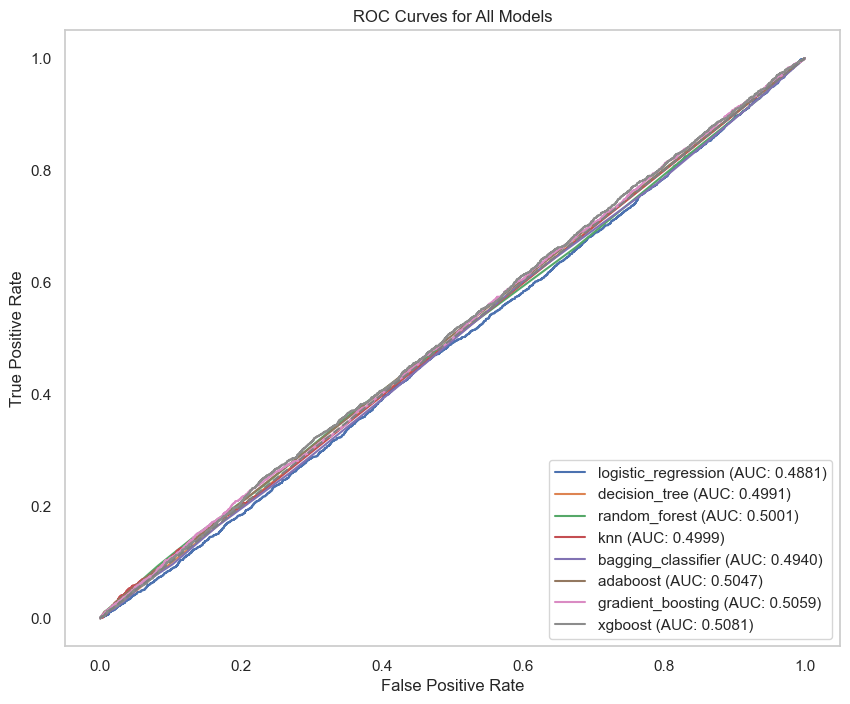

In [545]:
# Plot for the ROC curves
plt.figure(figsize=(10, 8))

# Pipeline
for name, model in pipelines.items():
    # Predict probabilities for AUC/ROC
    y_pred_proba = model.predict_proba(X_test)[:, 1]  
    auc = roc_auc_score(y_test, y_pred_proba)

    # Predict class labels for confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"{name} - AUC: {auc:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")
    print(f"Classification Report:\n{classification_report(y_test, y_pred, zero_division=0)}\n")

    # Generate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC: {auc:.4f})')

# Finalize the ROC curve plot
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

logistic_regression - AUC: 0.4881
Confusion Matrix:
[[19240 18715]
 [ 1055   990]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.51      0.66     37955
           1       0.05      0.48      0.09      2045

    accuracy                           0.51     40000
   macro avg       0.50      0.50      0.38     40000
weighted avg       0.90      0.51      0.63     40000


decision_tree - AUC: 0.4991
Confusion Matrix:
[[35900  2055]
 [ 1938   107]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     37955
           1       0.05      0.05      0.05      2045

    accuracy                           0.90     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.90      0.90      0.90     40000


random_forest - AUC: 0.5001
Confusion Matrix:
[[37955     0]
 [ 2045     0]]

Classification Report:
              precision    recall  

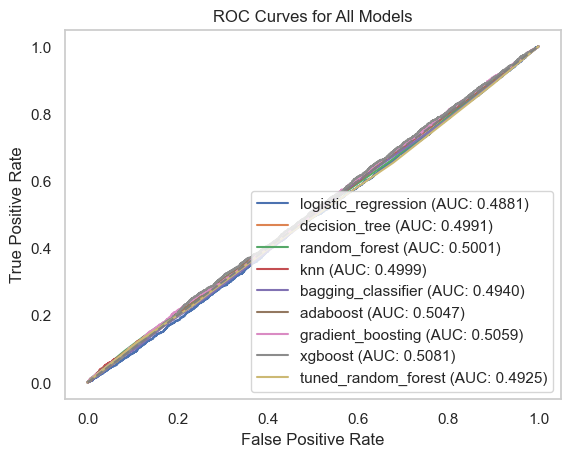

In [546]:
# Add the tuned Random Forest model to the pipelines dictionary
pipelines["tuned_random_forest"] = create_pipeline(best_rf)

# Fit all models in the pipeline
for name, model in pipelines.items():
    model.fit(X_train, y_train)  # Fit the pipeline on the training data

# Pipeline - Evaluate models
for name, model in pipelines.items():
    # Predict probabilities for AUC/ROC
    y_pred_proba = model.predict_proba(X_test)[:, 1]  
    auc = roc_auc_score(y_test, y_pred_proba)

    # Predict class labels for confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"{name} - AUC: {auc:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")
    print(f"Classification Report:\n{classification_report(y_test, y_pred, zero_division=0)}\n")

    # Generate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC: {auc:.4f})')

# Finalize the ROC curve plot
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Conclusion

### Findings

* There seem to be a minor difference in the number of fraud cases between genders suggesting that the fraud occurences is relatively balanced across the genders.

### Recommendation

#### Risk Assessment
Understanding the distribution of fraud cases by age group can aid in risk assessment and the development of targeted fraud prevention strategies. Financial institutions and security agencies can use this information to implement age-specific awareness campaigns and security measures.

#### Targeted Fraud Prevention
Understanding the distribution of fraud cases by gender can help in designing targeted fraud prevention strategies. For example, if females have a higher number of fraud cases, awareness campaigns and security measures can be tailored specifically for female users.


### Insights for next steps

* xx

### Reference

1. Central Bank of Kenya. (n.d.). Fraud safety. Retrieved March 13, 2025, from https://www.centralbank.go.ke/fraud-safety/

2. Kiplagat, S. (2022, June 28). Foreign woman, Kenyans linked to Sh2.3bn overseas card fraud. Business Daily. Retrieved from https://www.businessdailyafrica.com/bd/economy/foreign-woman-kenyans-linked-to-sh23bn-overseas-card-fraud-3861828

3. Kenyan Wall Street. (2024, March 10). INTERPOL arrests Kenyans involved in Ksh 1.1bn credit card fraud. Retrieved from https://kenyanwallstreet.com/interpol-arrests-kenyans-involved-in-ksh-1-1bn-credit-card-fraud/

4. PYMNTS. (2024, December 10). Scam-Related Fraud Jumped 56% in 2024, Surpassing Digital Payment Crimes. Retrieved from https://www.pymnts.com/news/security-and-risk/2024/scam-related-fraud-jumped-56percent-surpassing-digital-payment-crimes

5. Retail Banker International. (2024). ID fraud may account for 50% of bank reported fraud by 2025. Retrieved from https://www.retailbankerinternational.com/news/id-fraud-may-account-for-50-per-cent-of-bank-reported-fraud-by-2025/



